In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import tensorflow.keras as keras
#!pip install gensim
#!pip install google.cloud
#import gzip
import gensim
import logging

In [ ]:
corpus = ['king is a strong man','queen is a wise woman','boy is a young man',
          'girl is a young woman','prince is a young','prince will be strong',
          'princess is young','man is strong','woman is pretty', 'prince is a boy',
          'prince will be king', 'princess is a girl', 'princess will be queen']
print(corpus)

['king is a strong man', 'queen is a wise woman', 'boy is a young man', 'girl is a young woman', 'prince is a young', 'prince will be strong', 'princess is young', 'man is strong', 'woman is pretty', 'prince is a boy', 'prince will be king', 'princess is a girl', 'princess will be queen']


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
dtm = cv.fit_transform(corpus)
dtm = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm.head()


,be,boy,girl,is,king,man,pretty,prince,princess,queen,strong,will,wise,woman,young
0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0
2,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1
3,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
data = {'review': ['I loved this movie!', 'It was okay.', 'I hated it.', 'It was amazing!', 'I was disappointed.',
                   'It was a great experience.', 'I fell asleep during the movie.', 'It was a total waste of time.',
                   'I highly recommend this movie.', 'I would not recommend this movie.'],
       'sentiment': ['positive', 'neutral', 'negative', 'positive', 'negative',
                      'positive', 'negative', 'negative', 'positive', 'negative']}
df = pd.DataFrame(data)
df

,review,sentiment
0,I loved this movie!,positive
1,It was okay.,neutral
2,I hated it.,negative
3,It was amazing!,positive
4,I was disappointed.,negative
5,It was a great experience.,positive
6,I fell asleep during the movie.,negative
7,It was a total waste of time.,negative
8,I highly recommend this movie.,positive
9,I would not recommend this movie.,negative


In [ ]:
dtm = cv.fit_transform(df['review'])
dtm = pd.DataFrame(dtm.toarray(), columns=cv.get_feature_names_out())
dtm['sentiment'] = df['sentiment']
dtm.head()

,amazing,asleep,disappointed,during,experience,fell,great,hated,highly,it,...,okay,recommend,the,this,time,total,was,waste,would,sentiment
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,positive
1,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,neutral
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,negative
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,positive
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,negative


##Word Embedddings

## Q1 :Explore pre-trained word vectors. Explore word relationships using vector arithmetic. Perform arithmetic operations and analyze results.

In [ ]:
import gensim.downloader as api

# Load pre-trained word vectors (Word2Vec Google News)
word_vectors = api.load("word2vec-google-news-300")


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
#Example 1: King - Man + Woman ≈ Queen
result = word_vectors.most_similar(positive=['king', 'woman'], negative=['man'])
print(result[0])  # Expected: ('queen', similarity_score)

('queen', 0.7118193507194519)


In [ ]:
result = word_vectors.most_similar(positive=['Paris', 'Italy'], negative=['France'])
print(result[1])

('Rome', 0.702830970287323)


In [ ]:
corpus = [
"Trees are tall",
"Trees green",
"Trees majestic",
"Trees essential",
"Trees diverse",
"Trees oxygen-giving",
"computers fast",
"computers smart",
"computers useful",
"computers powerful",
"computers everywhere",
"computers changing"
]

In [ ]:

statements = []
from gensim.parsing.preprocessing import STOPWORDS
for statement in corpus:
  statements.append(statement.split())
docs = [[word for word in doc if word not in STOPWORDS]for doc in statements]
print(docs)
print(statements)


[['Trees', 'tall'], ['Trees', 'green'], ['Trees', 'majestic'], ['Trees', 'essential'], ['Trees', 'diverse'], ['Trees', 'oxygen-giving'], ['computers', 'fast'], ['computers', 'smart'], ['computers', 'useful'], ['computers', 'powerful'], ['computers'], ['computers', 'changing']]
[['Trees', 'are', 'tall'], ['Trees', 'green'], ['Trees', 'majestic'], ['Trees', 'essential'], ['Trees', 'diverse'], ['Trees', 'oxygen-giving'], ['computers', 'fast'], ['computers', 'smart'], ['computers', 'useful'], ['computers', 'powerful'], ['computers', 'everywhere'], ['computers', 'changing']]


In [ ]:
# prompt: GENSIM stopwords

from gensim.parsing.preprocessing import remove_stopwords

# Example usage with your existing corpus:
filtered_corpus = [remove_stopwords(text) for text in corpus]
filtered_corpus


['Trees tall',
 'Trees green',
 'Trees majestic',
 'Trees essential',
 'Trees diverse',
 'Trees oxygen-giving',
 'computers fast',
 'computers smart',
 'computers useful',
 'computers powerful',
 'computers',
 'computers changing']

In [ ]:
# prompt: from gensim import word2vec

from gensim.models import Word2Vec

model = Word2Vec(sentences=docs, min_count=1,vector_size=3,window=5)
#window：Context Window size
#size： size of word vector, hidden layer
#min-count：discard words that appear less than # times
#window：Context Window size
# Accessing the word vectors
print(model.wv['Trees'])

# Finding similar words
similar_words = model.wv.most_similar('Trees', topn=5)  # Find top 5 similar words
similar_words




[ 0.3003091  -0.31009832 -0.23722696]


[('essential', 0.9887179136276245),
 ('diverse', 0.8904159665107727),
 ('tall', 0.8618537783622742),
 ('changing', 0.058018364012241364),
 ('oxygen-giving', -0.18042652308940887)]

## Hyperparameters

### size
The hidden nodes size. The size of the dense vector to represent each token or word. If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes.

### window
Context window size. The maximum distance between the target word and its neighboring word. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter too much, as long as its a decent sized window.

### min_count
Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

In [ ]:
# prompt: how to check the word and its vectors simultaneously(use docs)

# Accessing word vectors and their corresponding words
for word in model.wv.index_to_key:
  print(f"Word: {word}, Vector: {model.wv[word]}")

print(model.wv.vectors,(model.wv.vectors.shape))


Word: computers, Vector: [-0.01787424  0.00788105  0.17011166]
Word: Trees, Vector: [ 0.3003091  -0.31009832 -0.23722696]
Word: changing, Vector: [ 0.21529575  0.2990996  -0.16718094]
Word: powerful, Vector: [-0.12544572  0.24601682 -0.05111571]
Word: useful, Vector: [-0.15122044  0.21846838 -0.16200535]
Word: smart, Vector: [-0.06053392  0.09588599  0.03306246]
Word: fast, Vector: [-0.27617383 -0.3149606   0.24372554]
Word: oxygen-giving, Vector: [0.16900873 0.22525644 0.02542885]
Word: diverse, Vector: [ 0.21169634 -0.1135122  -0.03154671]
Word: essential, Vector: [ 0.19228578 -0.25072125 -0.13120346]
Word: majestic, Vector: [-0.2503861  -0.03100141  0.31793728]
Word: green, Vector: [-0.24397223 -0.07779229 -0.06459137]
Word: tall, Vector: [ 0.2692479  -0.19769652  0.00150541]
[[-0.01787424  0.00788105  0.17011166]
 [ 0.3003091  -0.31009832 -0.23722696]
 [ 0.21529575  0.2990996  -0.16718094]
 [-0.12544572  0.24601682 -0.05111571]
 [-0.15122044  0.21846838 -0.16200535]
 [-0.06053392  

In [ ]:
vectors = model.wv

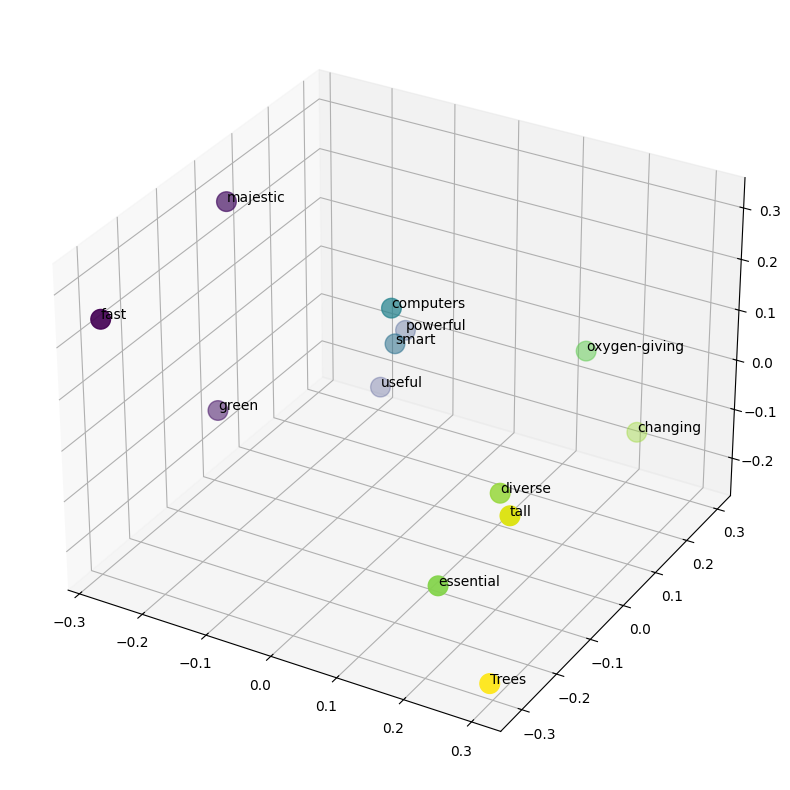

In [ ]:
import matplotlib.pyplot as plt
# Visualize the word vectors in 3D space using PCA
vectors = model.wv.vectors


fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')
#ax = plt.axes(projection='3d')

xdata = vectors[:, 0]
ydata = vectors[:, 1]
zdata = vectors[:, 2]
names=model.wv.index_to_key

ax.scatter3D(xdata, ydata, zdata, s=200 , c=xdata)
for names, x, y, z in zip(names, xdata, ydata, zdata):
    label = names
    ax.text(x, y, z, label )
plt.show()

####Lab Question 3: Train a custom Word2Vec model on a small dataset. Train embeddings on a domain-specific corpus (e.g., legal,medical) and analyze how embeddings capture domain-specific semantics.

In [ ]:
legal_corpus = [
    'Contracts binding',
    'Plaintiff alleging',
    'Defendant guilty',
    'Tort negligence',
    'Litigation ongoing',
    'Jurisdiction exclusive',
    'Arbitration binding',
    'Subpoena mandatory',
    'Affidavit sworn',
    'Liability strict'
]


In [ ]:
# prompt: tokenize the legal_corpus

legal_statements = []
for statement in legal_corpus:
  legal_statements.append(statement.split())
legal_docs = [[word for word in doc if word not in STOPWORDS]for doc in legal_statements]

legal_model = Word2Vec(sentences=legal_docs, min_count=1, vector_size=3, window=5)

# Accessing the word vectors
print(legal_model.wv['Contracts'])

# Finding similar words
similar_legal_words = legal_model.wv.most_similar('Contracts', topn=5)  # Find top 5 similar words
similar_legal_words


[ 0.28328732 -0.14873922  0.15058334]


[('sworn', 0.9234011769294739),
 ('exclusive', 0.8965725302696228),
 ('negligence', 0.8416187167167664),
 ('ongoing', 0.595180332660675),
 ('mandatory', 0.5756816864013672)]

##Question 2 : Use dimensionality reduction (e.g., PCA or t-SNE) to visualize word embeddings for Q 1. Select 10 words from a
##specific domain (e.g., sports, technology) and visualize their embeddings. Analyze clusters and relationships.
##Generate contextually rich outputs

[[-0.01787424  0.00788105  0.17011166]
 [ 0.3003091  -0.31009832 -0.23722696]
 [ 0.21529575  0.2990996  -0.16718094]
 [-0.12544572  0.24601682 -0.05111571]
 [-0.15122044  0.21846838 -0.16200535]
 [-0.06051214  0.09592687  0.03304125]
 [-0.27617383 -0.3149606   0.24372554]
 [ 0.16900873  0.22525644  0.02542885]
 [ 0.21169634 -0.1135122  -0.03154671]
 [ 0.19228578 -0.25072125 -0.13120346]
 [-0.2503861  -0.03100141  0.31793728]
 [-0.24397223 -0.07779229 -0.06459137]
 [ 0.2692479  -0.19769652  0.00150541]
 [-0.1584578  -0.32011834  0.16690977]
 [-0.2919862  -0.14639418 -0.00117   ]
 [-0.00987271 -0.25537467  0.32049143]
 [ 0.1660686   0.30777144 -0.27193058]
 [ 0.14985995 -0.13790254  0.02748454]
 [ 0.28328732 -0.14873922  0.15058334]] (19, 3)


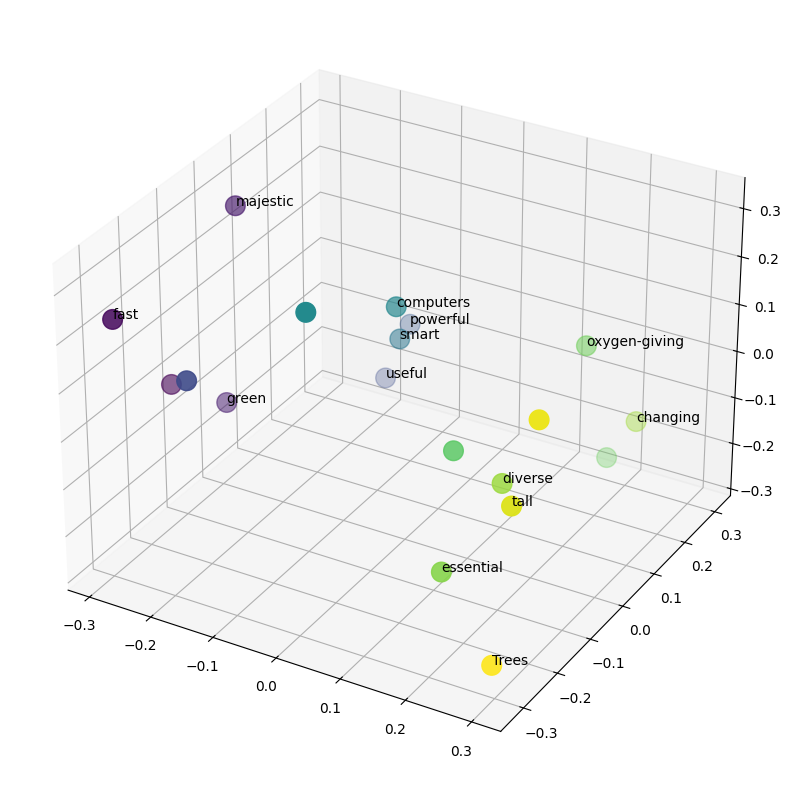

In [ ]:
print(legal_model.wv.vectors,(legal_model.wv.vectors.shape))

from matplotlib import pyplot as plt

figsize = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')


vectors = legal_model.wv.vectors

x_dim = vectors[:, 0]
y_dim = vectors[:, 1]
z_dim = vectors[:, 2]

ax.scatter3D(x_dim, y_dim, z_dim, s=200 , c=x_dim)


names = model.wv.index_to_key
for names, x, y, z in zip(names, xdata, ydata, zdata):
    label = names
    ax.text(x, y, z, label )
plt.show()


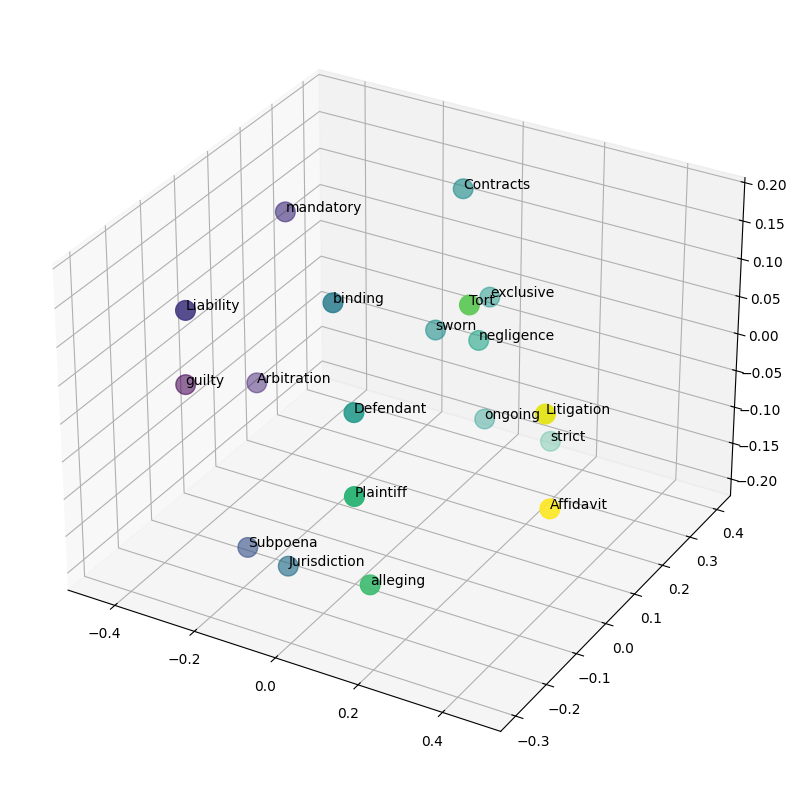

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Get word vectors from the model
vectors = legal_model.wv.vectors
names = legal_model.wv.index_to_key  # Get the word names

# Apply PCA to reduce dimensions to 3 for visualization
pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

# Extract the 3 components for plotting
x_dim = reduced_vectors[:, 0]
y_dim = reduced_vectors[:, 1]
z_dim = reduced_vectors[:, 2]

# Plot the reduced word vectors in 3D
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
ax.scatter3D(x_dim, y_dim, z_dim, s=200, c=x_dim)

# Add labels for each word
for name, x, y, z in zip(names, x_dim, y_dim, z_dim):
    ax.text(x, y, z, name)

# Show the plot
plt.show()


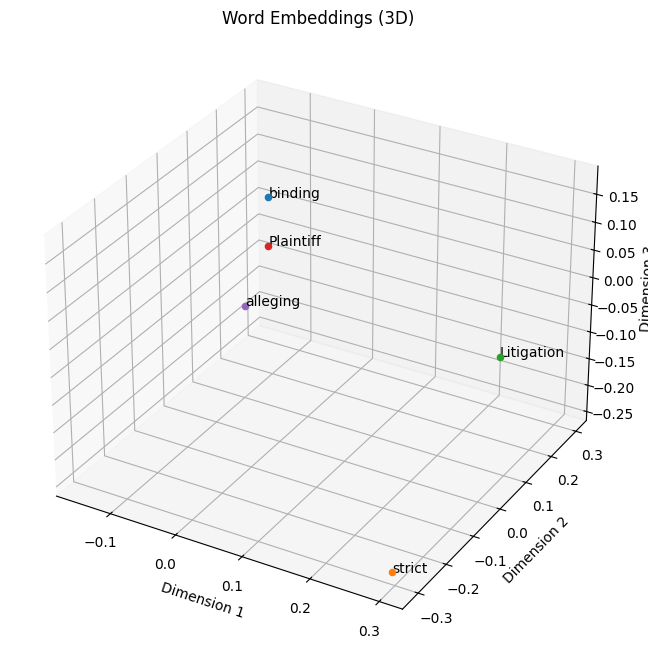

In [ ]:
# prompt: I want to plot the above created vectors on a 3-d plane. Please make the plot suffeciently big to see atleast top 5 words

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'legal_model' is your trained Word2Vec model
# Replace with your actual model if needed

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))  # Increase figure size
ax = fig.add_subplot(111, projection='3d')

# Get word vectors and corresponding words
words = []
vectors = []
for word in legal_model.wv.index_to_key:
    words.append(word)
    vectors.append(legal_model.wv[word])

# Convert vectors to NumPy array for easier handling
vectors = np.array(vectors)


# Plot the word vectors
for i, word in enumerate(words[:5]):  # Plot only top 5 words
    x, y, z = vectors[i]
    ax.scatter(x, y, z, marker='o')
    ax.text(x, y, z, word, fontsize=10)  # Add labels for each point


ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")
ax.set_title("Word Embeddings (3D)")


plt.show()


In [ ]:
from gensim.models import Word2Vec

# Example small legal corpus
legal_corpus = [
    ["contracts", "binding"],
    ["contracts", "enforceable"],
    ["contracts", "legal"],
    ["plaintiff", "injured"],
    ["plaintiff", "alleging"],
    ["defendant", "accused"],
    ["defendant", "liable"],
    ["defendant", "guilty"],
    ["tort", "negligence"],
    ["litigation", "ongoing"],
    ["arbitration", "binding"],
    ["jurisdiction", "applicable"]
]

# Train the Word2Vec model
legal_model = Word2Vec(sentences=legal_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save and load the model (optional)
legal_model.save("legal_word2vec.model")
legal_model = Word2Vec.load("legal_word2vec.model")


# Finding similar words
similar_legal_words = legal_model.wv.most_similar('plaintiff', topn=5)  # Find top 5 similar words
print(similar_legal_words)




[('litigation', 0.17826788127422333), ('enforceable', 0.13149002194404602), ('alleging', 0.07497557997703552), ('defendant', 0.06797593086957932), ('legal', 0.04157734662294388)]


In [ ]:
# Get similar words for key legal terms



Similar words for 'defendant': [('litigation', 0.16072483360767365), ('negligence', 0.13725273311138153), ('ongoing', 0.12300863116979599)]
